In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')

# Read the dataset
data = pd.read_csv("/content/drive/MyDrive/data mining project/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Get dataset information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Quick look at the columns and a few sample rows
print("Dataset Columns:", data.columns.tolist())
data.sample(5)


Dataset Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3454,6773-LQTVT,Female,1,Yes,Yes,29,No,No phone service,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,35.65,1025.15,No
4646,5032-MIYKT,Female,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.70,70.7,No
4996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,...,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3,No
5411,7932-WPTDS,Female,1,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,24.80,24.8,Yes
4595,2211-RMNHO,Female,0,Yes,Yes,68,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),85.30,5560,No


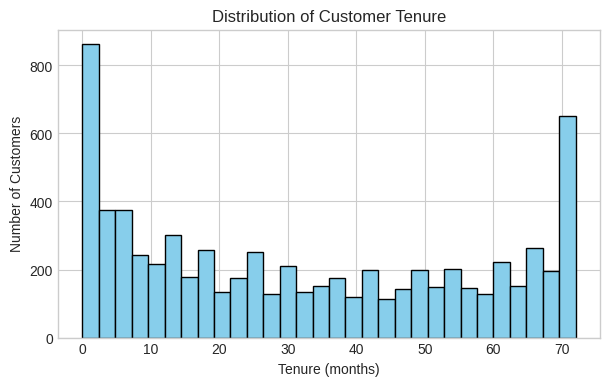

In [5]:
# Example: Histogram of tenure (months with the company)
plt.figure(figsize=(7,4))
plt.hist(data['tenure'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Customer Tenure")
plt.xlabel("Tenure (months)")
plt.ylabel("Number of Customers")
plt.show()


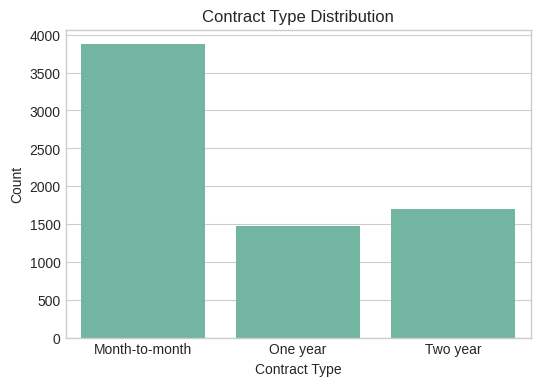

In [6]:
# Example: Bar plot for Contract types
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', data=data)
plt.title("Contract Type Distribution")
plt.xlabel("Contract Type")
plt.ylabel("Count")
plt.show()



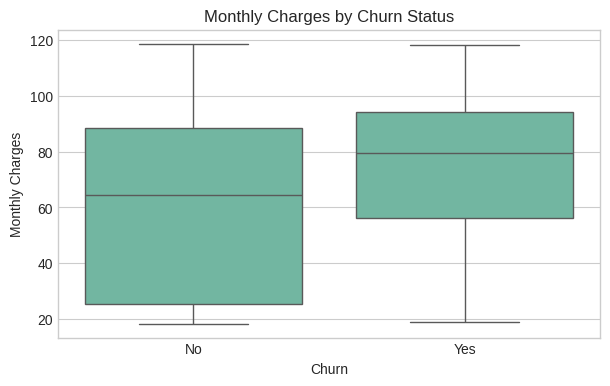

In [7]:
# Boxplot for Monthly Charges
plt.figure(figsize=(7,4))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title("Monthly Charges by Churn Status")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()


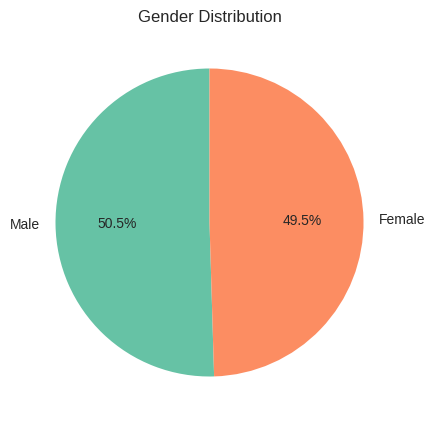

In [8]:
# Pie chart for gender distribution
plt.figure(figsize=(5,5))
data['gender'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()


In [9]:
# Value ranges and basic stats
data.describe()


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
# Skewness of numerical features
data.skew(numeric_only=True)


,0
SeniorCitizen,1.833633
tenure,0.239540
MonthlyCharges,-0.220524


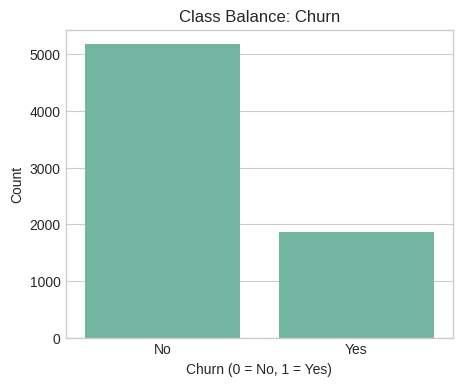

In [11]:
# Class balance (Churn)
plt.figure(figsize=(5,4))
sns.countplot(x='Churn', data=data)
plt.title("Class Balance: Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


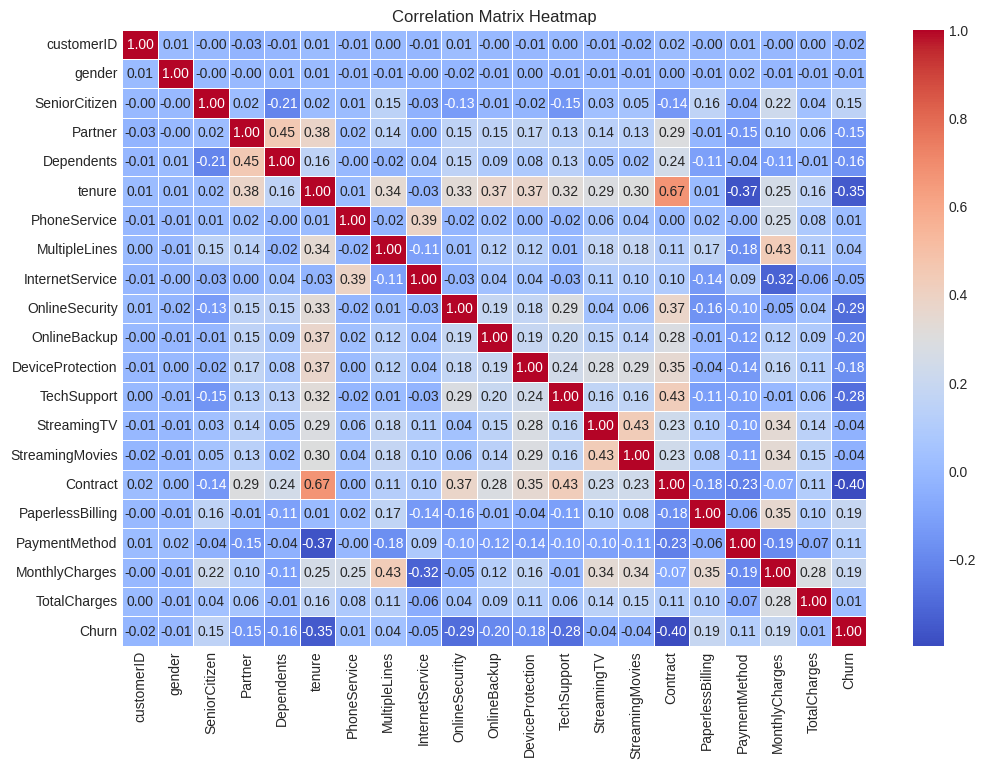

In [12]:
# Encode categorical variables for correlation (if needed)
data_corr = data.copy()
for col in data_corr.select_dtypes('object').columns:
    data_corr[col] = data_corr[col].astype('category').cat.codes

# Correlation matrix with annotated values
plt.figure(figsize=(12,8))
corr = data_corr.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()


##LAB 3

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/data mining project/WA_Fn-UseC_-Telco-Customer-Churn.csv")

print("Shape:", data.shape)
data.head()


Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###Missing values handeling

In [14]:
# Missing value audit
na_counts = data.isna().sum().sort_values(ascending=False)
display(na_counts[na_counts > 0])

,0


###Categorial features encoding

In [15]:
data["Churn"] = data["Churn"].replace({"Yes": 1, "No": 0})

/tmp/ipython-input-2578155999.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Churn"] = data["Churn"].replace({"Yes": 1, "No": 0})


In [16]:
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [17]:
data.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1


In [18]:
print(data["Churn"].value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64


In [19]:
# identifying columns with object data type
object_columns = data.select_dtypes(include="object").columns

In [20]:
print(object_columns)

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')


In [21]:
from sklearn.preprocessing import LabelEncoder
import pickle

# initialize a dictionary to save the encoders
encoders = {}

# apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  data[column] = label_encoder.fit_transform(data[column])
  encoders[column] = label_encoder


# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)

In [22]:
encoders

{'customerID': LabelEncoder(),
 'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder(),
 'TotalCharges': LabelEncoder()}

In [23]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,2505,0
1,3962,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1466,0
2,2564,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,157,1
3,5535,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1400,0
4,6511,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,925,1


###Normailzation

In [24]:
from sklearn.preprocessing import StandardScaler

# Select only numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Numeric Columns:", numeric_cols)

# Apply StandardScaler
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])


Numeric Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [25]:
# Before scaling (create a copy of original numeric data for comparison)
original_numeric = data[numeric_cols].copy()

print("=== After StandardScaler ===")
print(data[numeric_cols].describe().T[['mean','std','min','max']])


=== After StandardScaler ===
                          mean       std       min       max
customerID       -1.008864e-18  1.000071 -1.731805  1.731805
gender           -2.219500e-17  1.000071 -1.009559  0.990532
SeniorCitizen    -4.842546e-17  1.000071 -0.439916  2.273159
Partner           7.162933e-17  1.000071 -0.966622  1.034530
Dependents        1.069396e-16  1.000071 -0.654012  1.529024
tenure           -2.421273e-17  1.000071 -1.318165  1.613701
PhoneService      7.869137e-17  1.000071 -3.054010  0.327438
MultipleLines    -1.513296e-17  1.000071 -0.991588  1.117034
InternetService   8.575342e-18  1.000071 -1.183234  1.527734
OnlineSecurity    6.809830e-17  1.000071 -0.918838  1.407321
OnlineBackup      2.295165e-17  1.000071 -1.029919  1.242550
DeviceProtection -4.539887e-17  1.000071 -1.027910  1.245111
TechSupport      -3.127478e-17  1.000071 -0.925262  1.396299
StreamingTV       2.169057e-17  1.000071 -1.113495  1.146547
StreamingMovies   7.062046e-18  1.000071 -1.121405  1.13

In [26]:
data[numeric_cols].head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.911890,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,...,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-0.398608,-0.601023
1,0.216906,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,...,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,-0.948762,-0.601023
2,-0.470701,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,...,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.641883,1.663829
3,0.990587,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,...,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,-0.983710,-0.601023
4,1.470632,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,...,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.235224,1.663829


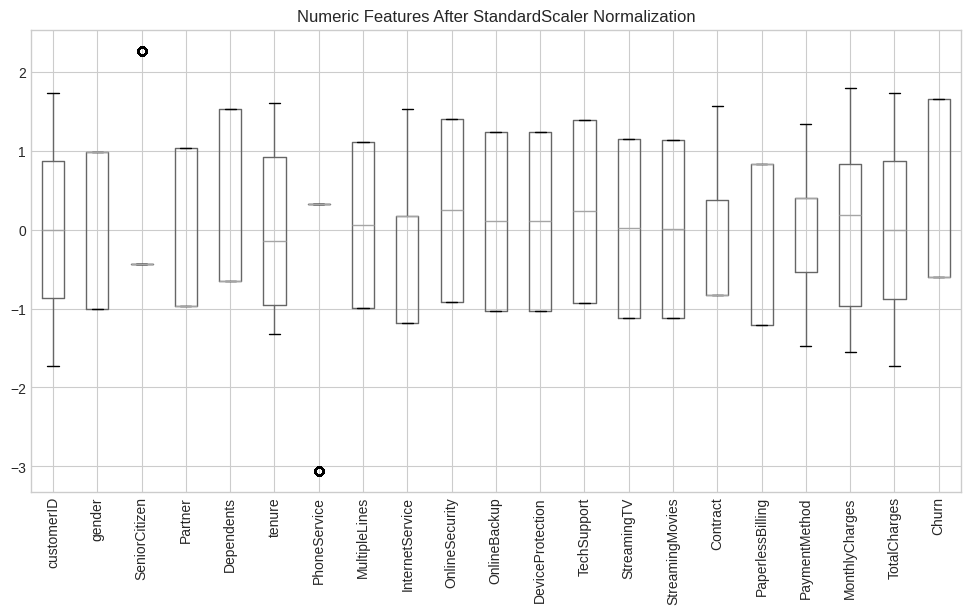

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
data[numeric_cols].boxplot()
plt.xticks(rotation=90)
plt.title("Numeric Features After StandardScaler Normalization")
plt.show()


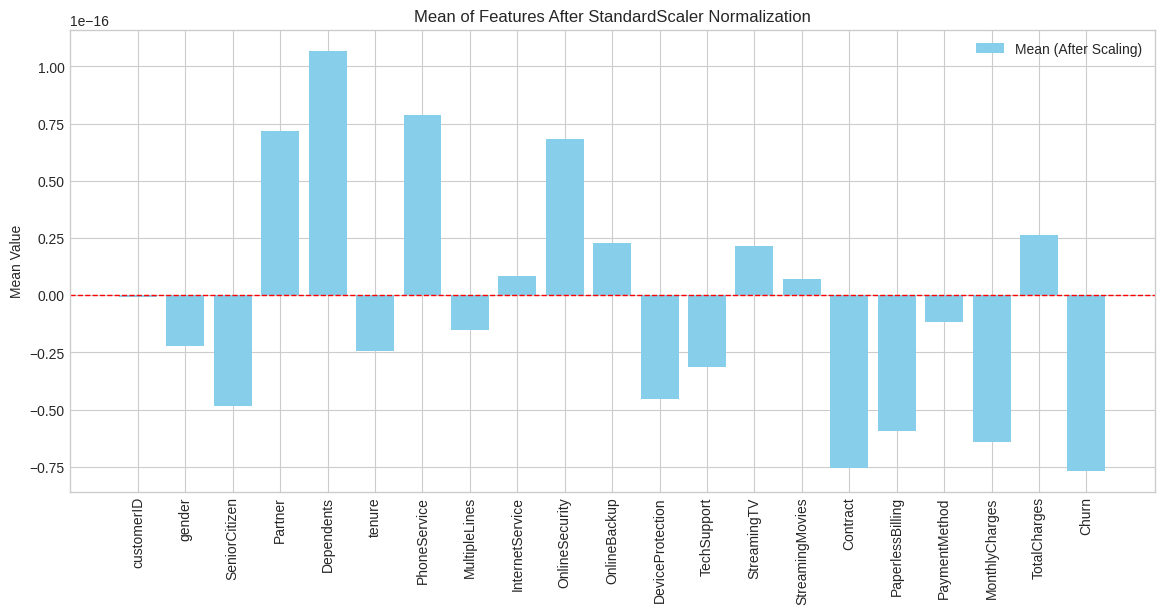

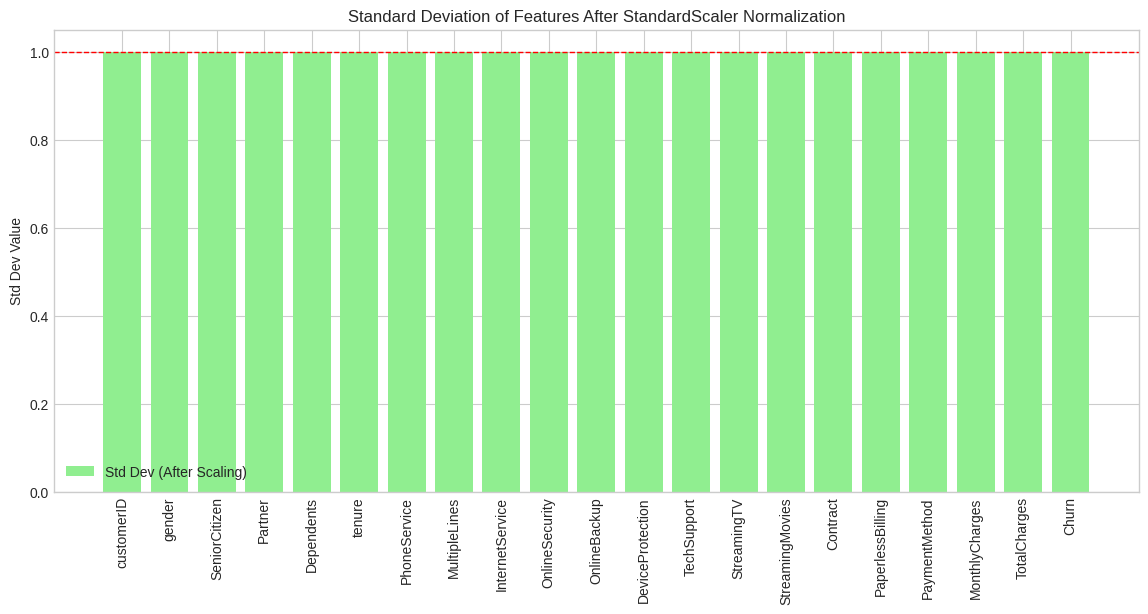

In [28]:
# Calculate mean and std for each numeric column after scaling
means = data[numeric_cols].mean()
stds = data[numeric_cols].std()

# Plot bar chart
plt.figure(figsize=(14,6))

# Bar chart for mean
plt.bar(means.index, means.values, color='skyblue', label='Mean (After Scaling)')
plt.axhline(0, color='red', linestyle='--', linewidth=1)  # reference line at 0

plt.xticks(rotation=90)
plt.title("Mean of Features After StandardScaler Normalization")
plt.ylabel("Mean Value")
plt.legend()
plt.show()

# Another bar chart for std
plt.figure(figsize=(14,6))
plt.bar(stds.index, stds.values, color='lightgreen', label='Std Dev (After Scaling)')
plt.axhline(1, color='red', linestyle='--', linewidth=1)  # reference line at 1

plt.xticks(rotation=90)
plt.title("Standard Deviation of Features After StandardScaler Normalization")
plt.ylabel("Std Dev Value")
plt.legend()
plt.show()

###LAB 4

####class imbalance chacking


In [29]:
import numpy as np
import pandas as pd

df = data.copy()

# Ensure target is 0/1
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].replace({'Yes':1,'No':0}).astype(int)

# Drop pure ID if present
if 'customerID' in df.columns:
    df = df.drop(columns=['customerID'])

print("Shape:", df.shape)
print("Class counts:\n", df['Churn'].value_counts())
print("Class ratio (positive rate):", df['Churn'].mean())


Shape: (7043, 20)
Class counts:
 Churn
-0.601023    5174
 1.663829    1869
Name: count, dtype: int64
Class ratio (positive rate): -7.66736446368985e-17


In [30]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Churn'])
y = df['Churn'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("Train:", X_train.shape, " Test:", X_test.shape)


Train: (5634, 19)  Test: (1409, 19)


####Feature selection


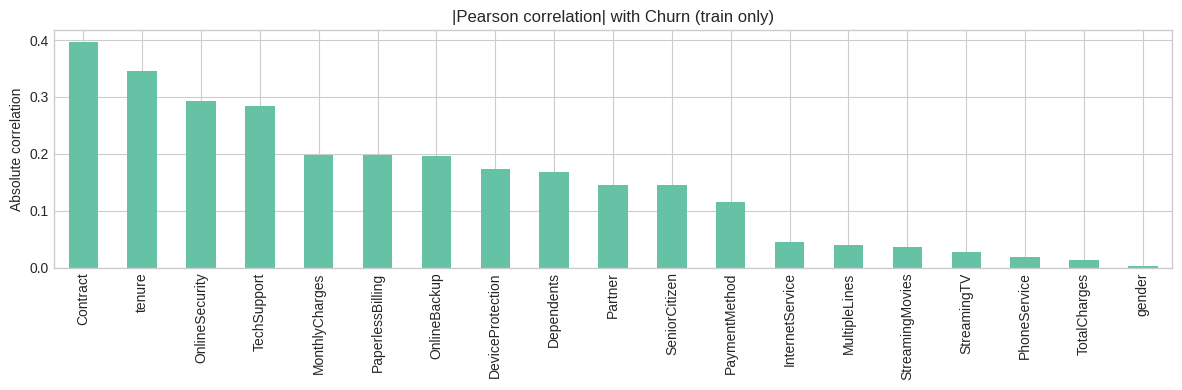

,Churn
Contract,-0.397269
tenure,-0.345593
OnlineSecurity,-0.293015
TechSupport,-0.283796
MonthlyCharges,0.198040
PaperlessBilling,0.197981
OnlineBackup,-0.195956
DeviceProtection,-0.173408
Dependents,-0.167459
Partner,-0.145717


In [31]:
# Pearson correlation (works since everything is numeric now)
corr_with_target = X_train.assign(Churn=y_train).corr()['Churn'].drop('Churn').sort_values(key=np.abs, ascending=False)

plt.figure(figsize=(12,4))
corr_with_target.head(20).abs().plot(kind='bar')
plt.title('|Pearson correlation| with Churn (train only)')
plt.ylabel('Absolute correlation')
plt.tight_layout(); plt.show()

corr_with_target.head(20)  # table view


#####Method 1 (Filter): Mutual Information

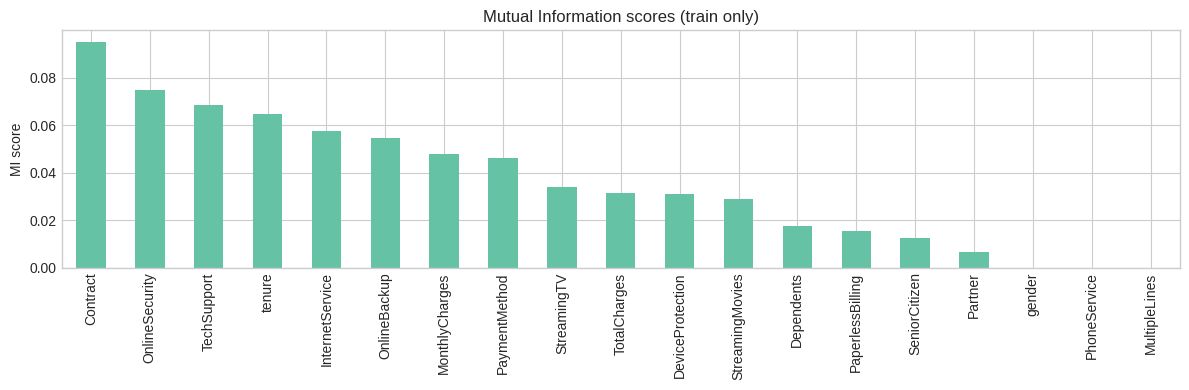

Top-k by MI: ['Contract', 'OnlineSecurity', 'TechSupport', 'tenure', 'InternetService', 'OnlineBackup', 'MonthlyCharges', 'PaymentMethod', 'StreamingTV', 'TotalCharges', 'DeviceProtection', 'StreamingMovies', 'Dependents', 'PaperlessBilling', 'SeniorCitizen', 'Partner', 'gender']  ...


In [32]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X_train, y_train, random_state=42)
mi_series = pd.Series(mi, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(12,4))
mi_series.head(20).plot(kind='bar')
plt.title('Mutual Information scores (train only)')
plt.ylabel('MI score')
plt.tight_layout(); plt.show()

# Top-k by MI (you can change k)
MI_TOPK = min(25, X_train.shape[1])
topk_mi = mi_series.head(MI_TOPK).index.tolist()
print("Top-k by MI:", topk_mi[:17], " ...")


#####Method 2 (Wrapper): RFECV with Logistic Regression

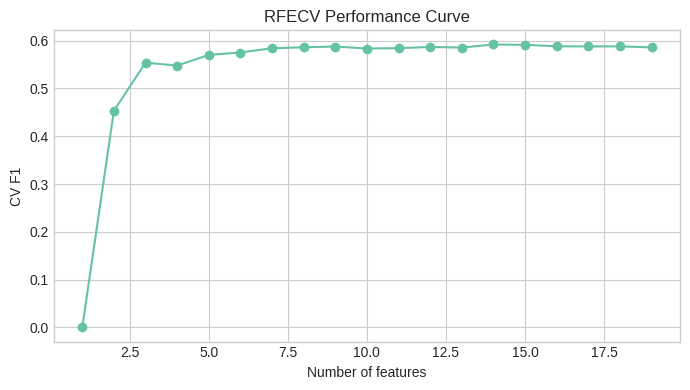

RFECV selected (14):
['SeniorCitizen', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold

base_est = LogisticRegression(max_iter=1000, solver='lbfgs')
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rfecv = RFECV(
    estimator=base_est,
    step=1,
    cv=cv,
    scoring='f1',   # better than accuracy for imbalanced targets
    n_jobs=-1
)
rfecv.fit(X_train, y_train)

# RFECV performance curve
scores = (rfecv.cv_results_['mean_test_score']
          if hasattr(rfecv, 'cv_results_') else rfecv.grid_scores_)
n_feats = np.arange(1, len(scores)+1)

plt.figure(figsize=(7,4))
plt.plot(n_feats, scores, marker='o')
plt.xlabel('Number of features')
plt.ylabel('CV F1')
plt.title('RFECV Performance Curve')
plt.grid(True); plt.tight_layout(); plt.show()

selected_rfe = X_train.columns[rfecv.support_].tolist()
print("RFECV selected ({}):".format(len(selected_rfe)))
print(selected_rfe)


######Final selected features

In [34]:
FINAL_FEATURES = ['Contract', 'Dependents', 'DeviceProtection', 'InternetService',
 'MonthlyCharges', 'MultipleLines', 'OnlineBackup', 'OnlineSecurity',
 'PaperlessBilling', 'PaymentMethod', 'PhoneService', 'SeniorCitizen',
 'StreamingMovies', 'StreamingTV', 'TechSupport', 'TotalCharges',
 'tenure', 'Partner', 'gender']

print("Final feature count:", len(FINAL_FEATURES))
print(FINAL_FEATURES)

Xtr_sel = X_train[FINAL_FEATURES].copy()
Xte_sel = X_test[FINAL_FEATURES].copy()


Final feature count: 19
['Contract', 'Dependents', 'DeviceProtection', 'InternetService', 'MonthlyCharges', 'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling', 'PaymentMethod', 'PhoneService', 'SeniorCitizen', 'StreamingMovies', 'StreamingTV', 'TechSupport', 'TotalCharges', 'tenure', 'Partner', 'gender']


#####Class imbalance handeling

#####Model evaluation




In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix,
    roc_auc_score, average_precision_score, f1_score, accuracy_score
)
from imblearn.over_sampling import SMOTE
import pandas as pd

######Before feature selection

In [36]:
m_all = LogisticRegression(max_iter=1000, solver='lbfgs')
m_all.fit(X_train, y_train)

proba_all = m_all.predict_proba(X_test)[:,1]
pred_all  = (proba_all >= 0.5).astype(int)

print("=== Baseline (All features, No imbalance handling) ===")
print(classification_report(y_test, pred_all, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, proba_all))
print("PR-AUC :", average_precision_score(y_test, proba_all))
print("F1     :", f1_score(y_test, pred_all))
print("Accuracy:", accuracy_score(y_test, pred_all))


=== Baseline (All features, No imbalance handling) ===
              precision    recall  f1-score   support

           0     0.8394    0.8937    0.8657      1035
           1     0.6417    0.5267    0.5786       374

    accuracy                         0.7963      1409
   macro avg     0.7405    0.7102    0.7221      1409
weighted avg     0.7869    0.7963    0.7895      1409

ROC-AUC: 0.8389108476064997
PR-AUC : 0.6304397631882737
F1     : 0.57856093979442
Accuracy: 0.7963094393186657


#####After feature selection + handeling class imbalance

In [37]:
sm = SMOTE(random_state=42, k_neighbors=5)
Xtr_sm, ytr_sm = sm.fit_resample(Xtr_sel, y_train)

In [38]:
print(ytr_sm.value_counts())

Churn
0    4139
1    4139
Name: count, dtype: int64


In [39]:
m_sel = LogisticRegression(max_iter=1000, solver='lbfgs')
m_sel.fit(Xtr_sm, ytr_sm)

proba_sel = m_sel.predict_proba(Xte_sel)[:,1]
pred_sel  = (proba_sel >= 0.5).astype(int)

print("\n=== After Feature Selection + SMOTE ===")
print(classification_report(y_test, pred_sel, digits=4))
print("ROC-AUC:", roc_auc_score(y_test, proba_sel))
print("PR-AUC :", average_precision_score(y_test, proba_sel))
print("F1     :", f1_score(y_test, pred_sel))
print("Accuracy:", accuracy_score(y_test, pred_sel))


=== After Feature Selection + SMOTE ===
              precision    recall  f1-score   support

           0     0.9005    0.7256    0.8036      1035
           1     0.5061    0.7781    0.6133       374

    accuracy                         0.7395      1409
   macro avg     0.7033    0.7518    0.7085      1409
weighted avg     0.7958    0.7395    0.7531      1409

ROC-AUC: 0.836384303391976
PR-AUC : 0.6258137050525623
F1     : 0.613277133825079
Accuracy: 0.7395315826827538


In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [41]:
from sklearn.model_selection import cross_val_score

# dictionary to store the cross validation results
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, Xtr_sm, ytr_sm, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.79
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.86
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.84
----------------------------------------------------------------------


In [42]:
cv_scores

{'Decision Tree': array([0.71799517, 0.73248792, 0.85024155, 0.83444109, 0.82114804]),
 'Random Forest': array([0.78623188, 0.8031401 , 0.9076087 , 0.89305136, 0.88761329]),
 'XGBoost': array([0.72705314, 0.76388889, 0.91183575, 0.8978852 , 0.89969789])}

####Random forest gives the highest accuracy

In [43]:
rfc = RandomForestClassifier(random_state=42)

In [44]:
rfc.fit(Xtr_sm, ytr_sm)

RandomForestClassifier(random_state=42)

In [45]:
# evaluate on test data
y_test_pred = rfc.predict(Xte_sel)

print("Accuracy Score:\n", accuracy_score(y_test, y_test_pred))
print("Confsuion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

Accuracy Score:
 0.7686302342086586
Confsuion Matrix:
 [[865 170]
 [156 218]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.84      1035
           1       0.56      0.58      0.57       374

    accuracy                           0.77      1409
   macro avg       0.70      0.71      0.71      1409
weighted avg       0.77      0.77      0.77      1409



In [46]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 500),       # Number of trees in the forest
    'max_depth': randint(5, 20),            # Maximum depth of the trees
    'min_samples_split': randint(2, 20),    # Minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 20),     # Minimum number of samples required to be at a leaf node
    'criterion': ['gini', 'entropy']        # Function to measure the quality of a split
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42),
    scoring='f1',
    random_state=42,
    n_jobs=-1,  # Use all available cores
    verbose=1   # Print progress
)

# Perform the randomized search
random_search.fit(Xtr_sm, ytr_sm)

# Print the best parameters and best score found
print("\nBest parameters found:", random_search.best_params_)
print("Best cross-validation F1 score:", random_search.best_score_)

Fitting 10 folds for each of 50 candidates, totalling 500 fits

Best parameters found: {'criterion': 'gini', 'max_depth': 17, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 108}
Best cross-validation F1 score: 0.8560445581502443



Classification Report:
              precision    recall  f1-score   support

           0     0.8587    0.8222    0.8401      1035
           1     0.5598    0.6257    0.5909       374

    accuracy                         0.7700      1409
   macro avg     0.7093    0.7239    0.7155      1409
weighted avg     0.7794    0.7700    0.7739      1409


Confusion Matrix:
 [[851 184]
 [140 234]]


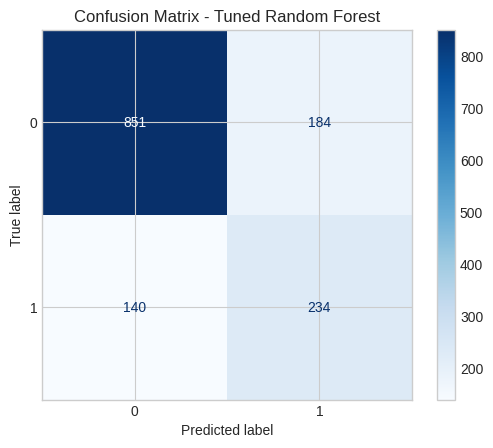

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Get the best model from RandomizedSearchCV
best_rf = random_search.best_estimator_

# Predict on your held-out test set (Xte_sel, y_test)
y_pred = best_rf.predict(Xte_sel)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=4))

# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()

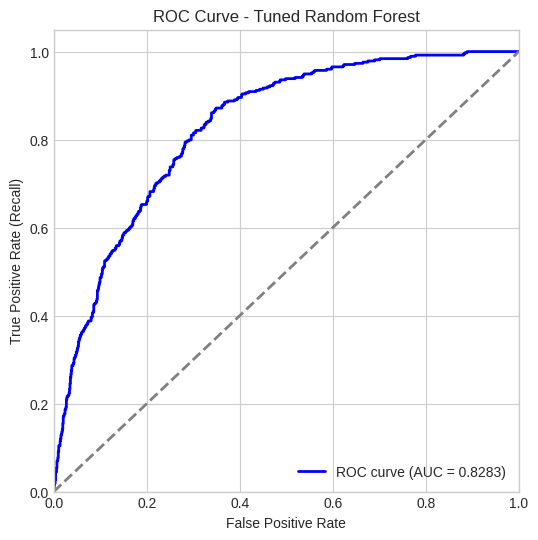

In [48]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for ROC curve (probability of class 1)
y_prob = best_rf.predict_proba(Xte_sel)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Tuned Random Forest")
plt.legend(loc="lower right")
plt.show()


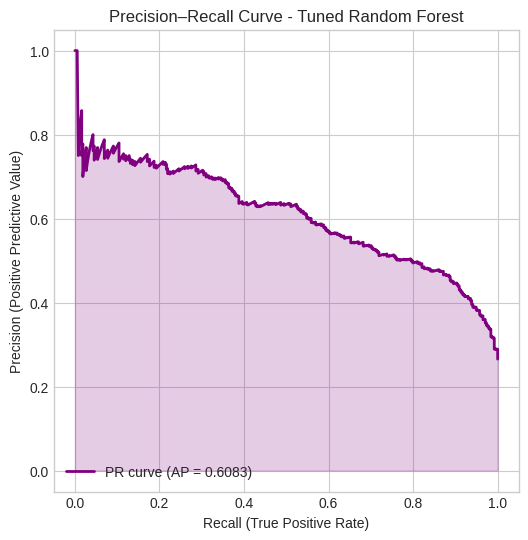

In [49]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Get prediction probabilities for the positive class
y_prob = best_rf.predict_proba(Xte_sel)[:, 1]

# Compute precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Compute average precision score (area under PR curve)
ap_score = average_precision_score(y_test, y_prob)

# Plot PR curve
plt.figure(figsize=(6,6))
plt.plot(recall, precision, color='purple', lw=2,
         label='PR curve (AP = %0.4f)' % ap_score)
plt.fill_between(recall, precision, alpha=0.2, color='purple')
plt.xlabel("Recall (True Positive Rate)")
plt.ylabel("Precision (Positive Predictive Value)")
plt.title("Precision–Recall Curve - Tuned Random Forest")
plt.legend(loc="lower left")
plt.show()


In [50]:
import pickle

# Define the filename for the pickle file
filename = 'tuned_random_forest_model.pkl'

# Save the trained model to the pickle file
with open(filename, 'wb') as f:
    pickle.dump(best_rf, f)

print(f"Trained model saved as {filename}")

Trained model saved as tuned_random_forest_model.pkl


####Testing

In [51]:
import pickle

# Define the filename for the pickle file
filename = 'tuned_random_forest_model.pkl'

# Load the trained model from the pickle file
with open(filename, 'rb') as f:
    loaded_model = pickle.load(f)

print(f"Model loaded successfully from {filename}")

Model loaded successfully from tuned_random_forest_model.pkl


In [55]:
# Save the scaler object
scaler_filename = 'scaler.pkl'
with open(scaler_filename, 'wb') as f:
    pickle.dump(scaler, f)

print(f"Scaler saved as {scaler_filename}")

Scaler saved as scaler.pkl


In [56]:
import pickle

# Save the FINAL_FEATURES list
features_filename = 'FINAL_FEATURES.pkl'
with open(features_filename, 'wb') as f:
    pickle.dump(FINAL_FEATURES, f)

print(f"Final features list saved as {features_filename}")

Final features list saved as FINAL_FEATURES.pkl


In [57]:
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler

# User-provided input data (replace with actual user input)
user_input_data = {
    'customerID': ['8888-AAAA'],
    'gender': ['Male'],
    'SeniorCitizen': [0],
    'Partner': ['Yes'],
    'Dependents': ['No'],
    'tenure': [24],
    'PhoneService': ['Yes'],
    'MultipleLines': ['No'],
    'InternetService': ['Fiber optic'],
    'OnlineSecurity': ['No'],
    'OnlineBackup': ['Yes'],
    'DeviceProtection': ['No'],
    'TechSupport': ['No'],
    'StreamingTV': ['Yes'],
    'StreamingMovies': ['Yes'],
    'Contract': ['Month-to-month'],
    'PaperlessBilling': ['Yes'],
    'PaymentMethod': ['Electronic check'],
    'MonthlyCharges': [90.0],
    'TotalCharges': ['2160.0']
}

# Create a DataFrame from the user input
input_df = pd.DataFrame(user_input_data)

# Load the saved label encoders
with open("encoders.pkl", "rb") as f:
    encoders = pickle.load(f)

# Apply the loaded label encoders to the categorical columns of the input DataFrame
for col, encoder in encoders.items():
    if col in input_df.columns and input_df[col].dtype == 'object':
        # Handle unseen labels by transforming to NaN and then imputing or dropping
        try:
            input_df[col] = encoder.transform(input_df[col])
        except ValueError:
            print(f"Warning: Unseen labels in column '{col}'. Setting to NaN.")
            input_df[col] = input_df[col].apply(lambda x: encoder.transform([x])[0] if x in encoder.classes_ else np.nan)


In [58]:
# Select only numeric columns from the original data, excluding 'Churn'
numeric_cols_original_for_scaler = original_numeric.drop(columns=['Churn']).columns.tolist()

# Initialize a StandardScaler object and fit it to the original numeric data excluding 'Churn'
scaler = StandardScaler()
scaler.fit(original_numeric[numeric_cols_original_for_scaler])

# Select only the numeric columns from the input DataFrame after encoding, excluding 'Churn'
numeric_cols_input_for_scaler = input_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Churn' in numeric_cols_input_for_scaler:
    numeric_cols_input_for_scaler.remove('Churn')


# Transform the numeric columns of the input DataFrame
input_df[numeric_cols_input_for_scaler] = scaler.transform(input_df[numeric_cols_input_for_scaler])

# Select only the features that were used for training the model (FINAL_FEATURES)
input_df_processed = input_df[FINAL_FEATURES].copy()

display(input_df_processed)

,Contract,Dependents,DeviceProtection,InternetService,MonthlyCharges,MultipleLines,OnlineBackup,OnlineSecurity,PaperlessBilling,PaymentMethod,PhoneService,SeniorCitizen,StreamingMovies,StreamingTV,TechSupport,TotalCharges,tenure,Partner,gender
0,7.566478e-17,-1.069396e-16,4.539887e-17,1.0,90.0,1.513296e-17,2.0,-6.809830e-17,1.0,2.0,1.0,4.842546e-17,2.0,2.0,3.127478e-17,NaN,24.0,1.0,1.0


In [59]:
# Predict churn probability
churn_probability = loaded_model.predict_proba(input_df_processed)[:, 1]

# Predict the churn class
predicted_class = loaded_model.predict(input_df_processed)

print(f"Predicted Churn Probability: {churn_probability[0]:.4f}")
print(f"Predicted Churn Class: {predicted_class[0]}")

Predicted Churn Probability: 0.6510
Predicted Churn Class: 1


In [60]:
# Print a user-friendly message based on the predicted class
if predicted_class[0] == 1:
    print("Prediction: This customer is predicted to CHURN.")
else:
    print("Prediction: This customer is predicted NOT to churn.")

# Print the predicted churn probability
print(f"Predicted Churn Probability: {churn_probability[0]:.4f}")

Prediction: This customer is predicted to CHURN.
Predicted Churn Probability: 0.6510
